# Homework 2

### NGUYEN, Huu Canh
### SID: 20818623

## Q2

In [1]:
import scipy.io
import numpy as np
mat = scipy.io.loadmat('snp452-data.mat')

In [2]:
# a)
X = mat['X']
Y = np.log(X)

In [3]:
# b)
Delta_Y = np.diff(Y, n=1, axis=0).transpose()
Delta_Y.shape

(452, 1257)

In [4]:
# c)
Sigma = 1/1257*np.dot(Delta_Y, np.transpose(Delta_Y))
Sigma.shape

(452, 452)

In [5]:
# d)
eigenValues, eigenVectors = np.linalg.eig(Sigma)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [6]:
# e)
R = 500
Lambda = np.empty([R, Delta_Y.shape[0]])
for r in range(R):
    Y_tidle = [np.random.permutation(Delta_Y[i]) for i in range(Delta_Y.shape[0])]
#     Y_tidle = np.random.permutation(Delta_Y.transpose()).transpose()
    Sigma_hat = 1/1257*np.dot(Y_tidle, np.transpose(Y_tidle))
    e, _ = np.linalg.eig(Sigma_hat)
    idx = e.argsort()[::-1]   
    e = e[idx]
    Lambda[r] = e


In [7]:
p_values = np.empty([Delta_Y.shape[0]])
permuted_top_5 = np.empty([Delta_Y.shape[0]])
for i in range(Delta_Y.shape[0]):
    p_values[i] = (Lambda[:,i] > eigenValues[i]).sum()/R
    idx = np.argpartition(Lambda[:,i], -25)[-25:]
    permuted_top_5[i]=Lambda[idx,i].mean()

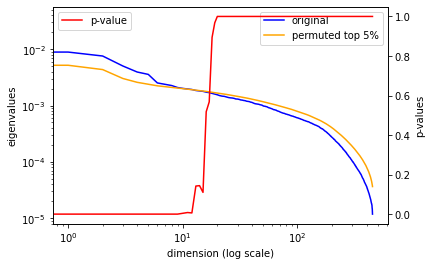

In [8]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.set_xlabel('dimension (log scale)')
ax1.set_ylabel('eigenvalues')

plt.plot(eigenValues, color='blue', label='original')
plt.plot(permuted_top_5, color='orange', label='permuted top 5%')
plt.yscale("log")
plt.legend()

ax2 = ax1.twinx()
ax2.set_ylabel('p-values')
plt.plot(p_values, color='red', label='p-value')
plt.xscale("log")

plt.legend()
plt.show()

According to Horn's Parallel Analysis, we will keep 13 dimensions which most explain the variance of one-day price changes. Not surprisingly, this number is approximate to the number of sectors (11) of S&P500 as stocks in a same sector tend to have similar price trend.

## Q3

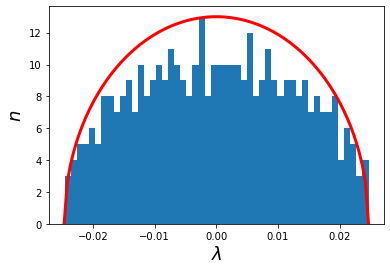

In [9]:
import numpy as np
from scipy import linalg as LA
from random import gauss
from math import sqrt
import matplotlib.pylab as plt


n = 400 # dimension of the random matrix
x = np.zeros((n,n))             
for i in range(n):
    for j in range(i,n):
        x[i, j] = gauss(0,1/(4*n)) 
        x[j, i] = x[i, j]      
evals = LA.eigvals(x).real     
bins, vals, patches = plt.hist(evals.real, bins = 50)   
H = max(bins)                                           
R = max(abs(vals))                                      
x = np.linspace(-R,R,100)                               
y = np.array([H*sqrt(1-(xval/R)**2) for xval in x])     

plt.plot(x, y, color = 'r', linewidth = 3)              
plt.xlabel(r'$\lambda$', fontsize = 18)                
plt.ylabel(r'$n$', fontsize = 18)                       
plt.show()